In [1]:
%matplotlib inline

In [61]:
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sklearn as sk
import sklearn.svm

In [3]:
import utils
import visualization
import generate_features

## Feature generation
Load the data from the .mat files, generate the features, and save the resulting data to .csv files.  
For more implementation details have a look at **generate_features.py**

In [4]:
generate_features.main()

Loading data/raw_from_matlab/data2016.mat
('brushing', 'drinking', 'shoe', 'writing')
Saving data with features to data/processed/2016.csv
Loading data/raw_from_matlab/data2017.mat
('drinking', 'brushing', 'writing', 'shoe')
Saving data with features to data/processed/2017.csv
Loading data/raw_from_matlab/data2018.mat
('brushing', 'writing', 'drinking', 'shoelacing')
Saving data with features to data/processed/2018.csv
Saving full data with features to data/processed/all.csv


## Data Exploration

First load the data and inspect it.

In [5]:
df = pd.read_csv('data/processed/2018.csv')

print('Columns:')
print(df.columns)
print('Five random rows:')
print(df.sample(5))

Columns:
Index(['gx', 'gy', 'gz', 'std', 'skewness', 'f25', 'f75', 'label'], dtype='object')
Five random rows:
           gx        gy        gz       std  skewness       f25        f75  \
90   8.080169 -0.558094  5.462528  0.704369 -0.847650  1.890874  11.238504   
111  8.944689  1.249724  2.778680  0.861067  3.129340  6.287103  18.320482   
39  -2.568688  3.910975  6.500156  0.595276  0.688932  0.814595   9.449300   
108  4.986731  0.168649  8.730247  0.663783  2.337934  5.331451  14.096717   
103  7.229962 -0.207083  6.214145  0.505798  3.946139  4.248412  14.869441   

        label  
90    writing  
111   writing  
39   drinking  
108   writing  
103   writing  


Visualize pairs of features, using the [seaborn](https://seaborn.pydata.org/) function `pairplot`.

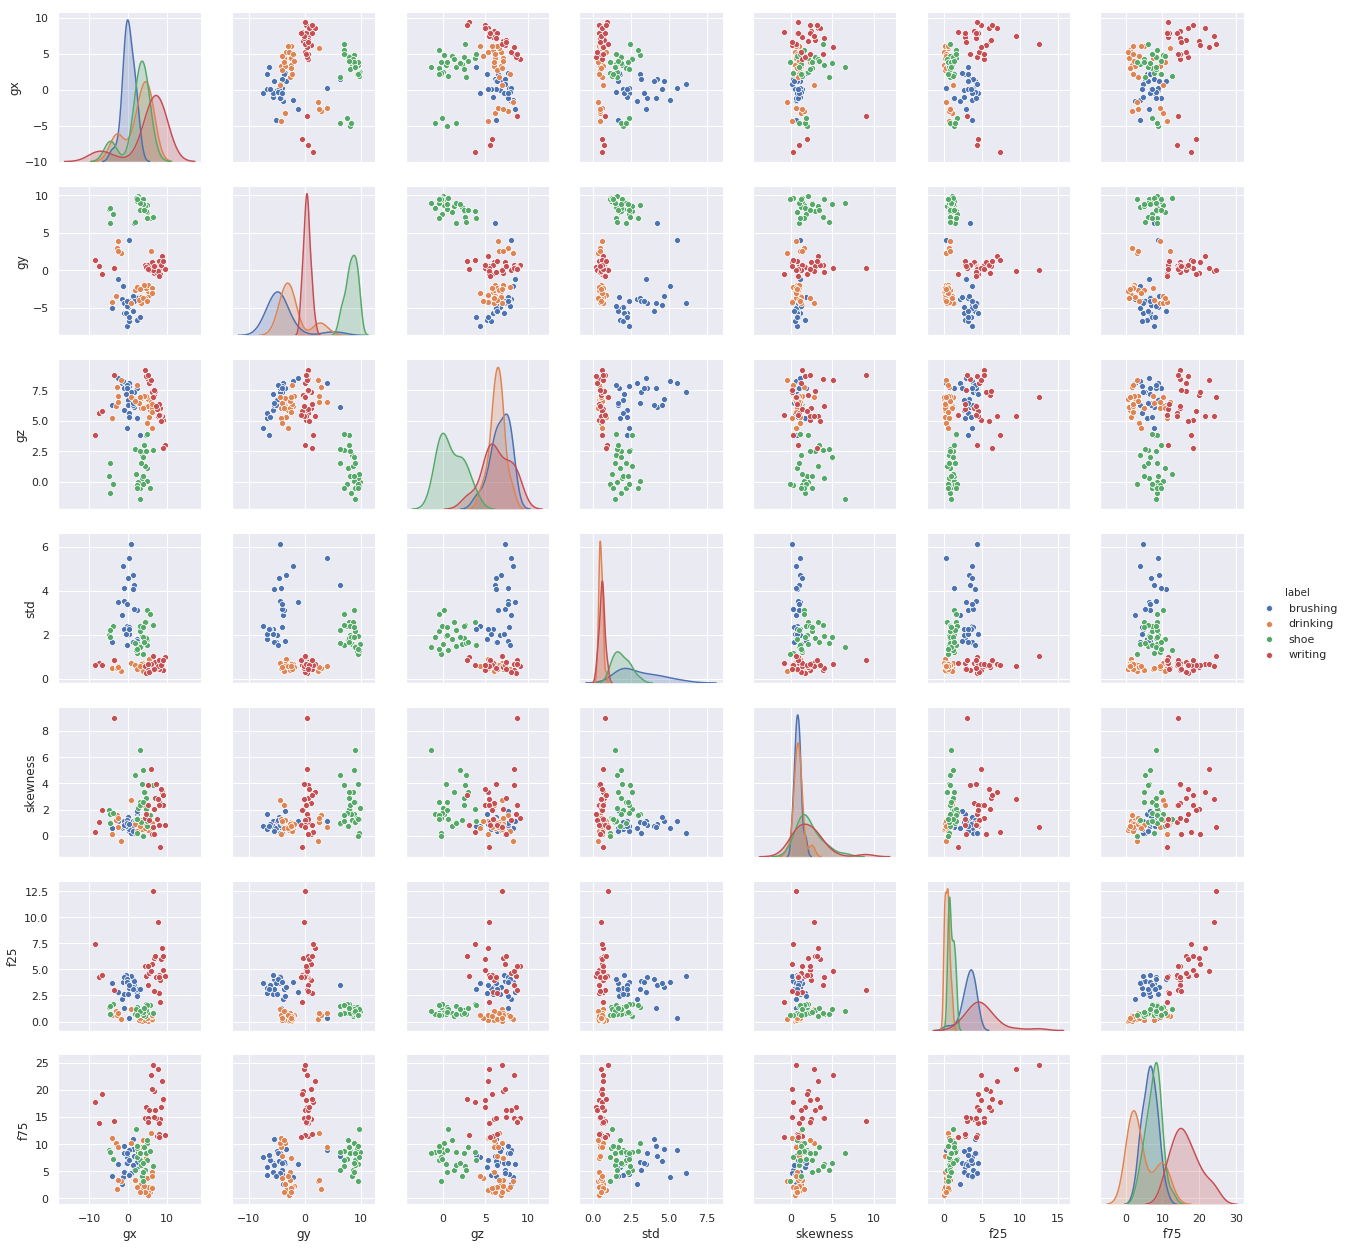

In [6]:
sns.pairplot(df, hue='label')

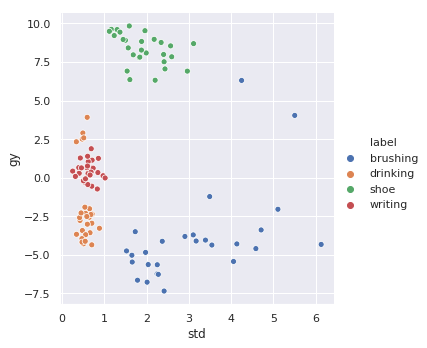

In [7]:
sns.relplot(x='std', y='gy', data=df, hue='label')

## Train SVM
Fist create the necessary variables `X` and `y` and split them into train and test data.  

In [8]:
X = df[['std', 'gy']]
y = df.label == 'brushing'

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
    X, y, test_size=1/3, random_state=0)

The actual training is done using [scikit-learn](https://scikit-learn.org/stable/).

In [9]:
clf = sk.svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Visualize the trained Classifier

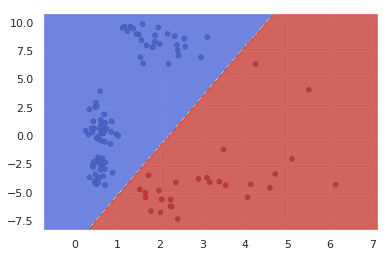

In [10]:
visualization.plot_contours(X, y, clf)

### ROC

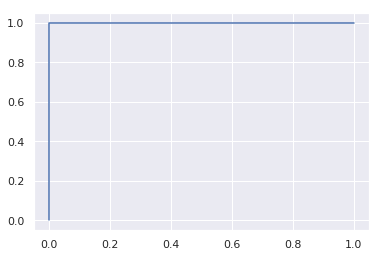

In [11]:
visualization.plot_roc(X_test, y_test, clf)

### ROC-AUC

In [12]:
roc_auc = sk.metrics.roc_auc_score(y, clf.decision_function(X))
print('Area under ROC curve:', roc_auc)

Area under ROC curve: 1.0


### Confusion Matrix

In [ ]:
confusion_matrix = sk.metrics.confusion_matrix(y, clf.predict(X))

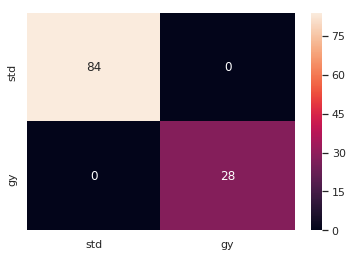

In [13]:
visualization.plot_confusion_matrix(X, y, clf)

### Accuracy

In [14]:
print('Accuracy on the train data:', sk.metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Accuracy on the test data:', sk.metrics.accuracy_score(y_test, clf.predict(X_test)))

Accuracy on the train data: 1.0
Accuracy on the test data: 1.0


## Performance on 2016&2017 data

Accuracy on the 2016 data: 0.8
Accuracy on the 2017 data: 0.5


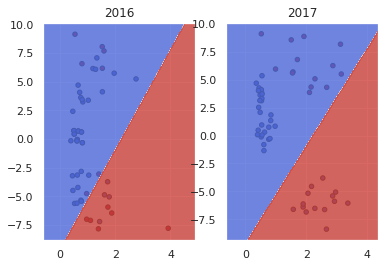

In [57]:
fig, sub = plt.subplots(1, 2)
for i, year in enumerate([2016, 2017]):
    
    df = pd.read_csv(f'data/processed/{year}.csv')
    X = df[['std', 'gy']]
    y = df.label == 'brushing'
    
    print(f'Accuracy on the {year} data:', sk.metrics.accuracy_score(y, clf.predict(X)))
    ax = visualization.plot_contours(X, y, clf, ax=sub[i])
    ax.set_title(year)

## Detection on new data
The `testData.mat` file is structured differently to the files we trained on.

In [63]:
test_data = utils.load_testdata()
pprint(test_data)

               x         y          z  label
0      -2.650602  0.192771   9.481928      0
1      -2.626506  0.204819   9.542169      0
2      -2.590361  0.337349   9.554217      0
3      -2.686747  0.493976   9.445783      0
4      -2.807229  0.602410   9.361446      0
5      -2.843373  0.638554   9.337349      0
6      -2.831325  0.674699   9.313253      0
7      -2.722892  0.686747   9.313253      0
8      -2.518072  0.686747   9.493976      0
9      -2.277108  0.759036   9.638554      0
10     -2.192771  0.831325   9.614458      0
11     -2.240964  0.855422   9.638554      0
12     -2.228916  0.783133   9.710843      0
13     -2.265060  0.686747   9.783133      0
14     -2.240964  0.614458   9.939759      0
15     -2.253012  0.614458  10.096386      0
16     -2.265060  0.722892  10.313253      0
17     -2.253012  0.831325  10.421687      0
18     -2.240964  0.855422  10.493976      0
19     -2.325301  0.771084  10.530120      0
20     -2.397590  0.614458  10.578313      0
21     -2.

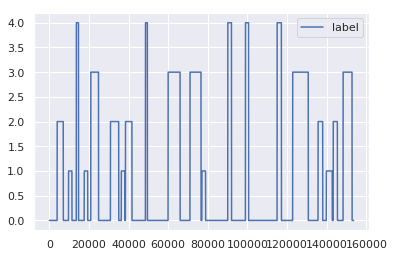

In [65]:
test_data.plot(
    y='label'
)

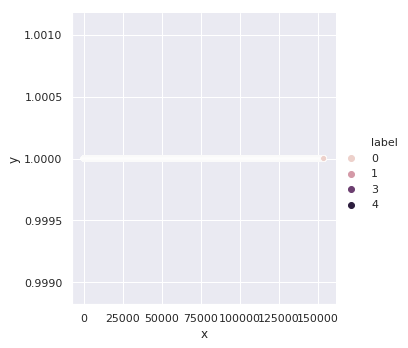

In [48]:
make_windows